# Global COVID-19 Analysis

In [148]:
from itables import init_notebook_mode
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker


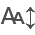

In [149]:
init_notebook_mode(all_interactive=True)

In [150]:
df = pd.read_csv('../data/processed/covid_data_processed.csv')

In [151]:
df.head(3)

Date               Country WHO_region  New_cases  Cumulative_cases  \
0  2020-01-04       Solomon Islands        WPR        0.0                 0   
1  2020-01-04             Sri Lanka       SEAR        0.0                 0   
2  2020-01-04  Syrian Arab Republic        EMR        NaN                 0   

   New_deaths  Cumulative_deaths  
0         0.0                  0  
1         0.0                  0  
2         NaN                  0

In [152]:
df.tail(3)

Date     Country WHO_region  New_cases  Cumulative_cases  \
445677  2025-02-02        Mali        AFR        NaN             33183   
445678  2025-02-02  Mauritania        AFR        NaN             63882   
445679  2025-02-02      Mexico        AMR        NaN           7622513   

        New_deaths  Cumulative_deaths  
445677         NaN                743  
445678         NaN                997  
445679         NaN             334818

In [153]:
df.describe()

New_cases  Cumulative_cases     New_deaths  Cumulative_deaths
count  2.084630e+05      4.456800e+05  209405.000000       4.456800e+05
mean   3.729050e+03      1.927264e+06      33.847000       2.090316e+04
std    4.878001e+04      8.193862e+06     208.761141       8.451313e+04
min   -6.507900e+04      0.000000e+00   -3520.000000       0.000000e+00
25%    3.000000e+00      5.507000e+03       0.000000       3.400000e+01
50%    6.100000e+01      5.189900e+04       0.000000       6.620000e+02
75%    6.860000e+02      6.105580e+05       7.000000       7.554000e+03
max    6.966046e+06      1.034368e+08   44047.000000       1.216003e+06

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445680 entries, 0 to 445679
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Date               445680 non-null  object 
 1   Country            445680 non-null  object 
 2   WHO_region         445680 non-null  object 
 3   New_cases          208463 non-null  float64
 4   Cumulative_cases   445680 non-null  int64  
 5   New_deaths         209405 non-null  float64
 6   Cumulative_deaths  445680 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 23.8+ MB


In [155]:
df.shape

(445680, 7)

In [156]:
df['Date'].agg(['min', 'max'])

min    2020-01-04
max    2025-02-02
Name: Date, dtype: object

In [157]:
df['Country'].agg(['min', 'max'])

min    Afghanistan
max       Zimbabwe
Name: Country, dtype: object

# EDA Analysis 

## World Daily Covid Cases

In [158]:
df['Date'] = pd.to_datetime(df['Date'])
world_daily_stats = df.groupby('Date')[['New_cases', 'New_deaths']].agg(['sum']).reset_index()
world_daily_stats.columns = ['Date', 'New_cases', 'New_deaths']
world_daily_stats.head(3)

Date  New_cases  New_deaths
0 2020-01-04        3.0         0.0
1 2020-01-05       -1.0         3.0
2 2020-01-06        3.0         0.0

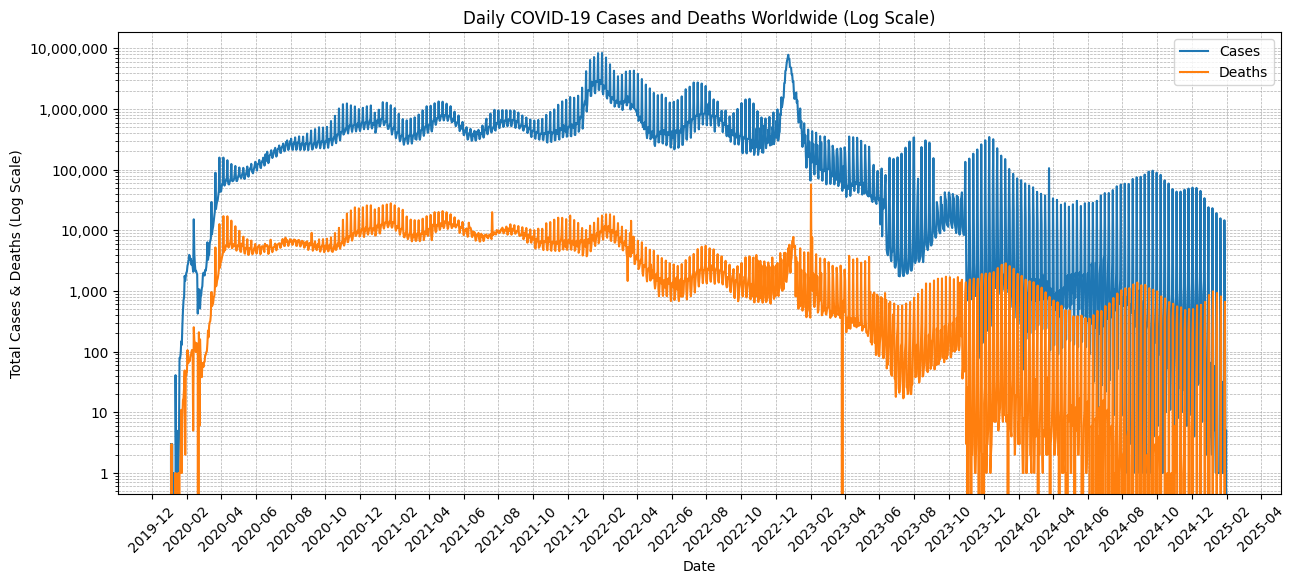

In [159]:
# Plot
plt.figure(figsize=(15, 6))
sns.lineplot(x='Date', y='New_cases', data=world_daily_stats, label='Cases')
sns.lineplot(x='Date', y='New_deaths', data=world_daily_stats, label='Deaths')

# Improve X-axis readability (weekly intervals)
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))  # Show every week
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format as YYYY-MM

# Set Y-axis to logarithmic scale
plt.yscale('log')

# Improve Y-axis readability (log scale formatter)
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Labels & Title
plt.xlabel('Date')
plt.ylabel('Total Cases & Deaths (Log Scale)')
plt.title('Daily COVID-19 Cases and Deaths Worldwide (Log Scale)')

plt.grid(True, which="both", linestyle="--", linewidth=0.5)  # Add grid for better readability
plt.legend()

plt.show()

the graph has way too many inconsistensies, making the graph look wide and unreadable. So, the data will be change into weekly aggregates to see if the graph looks better.

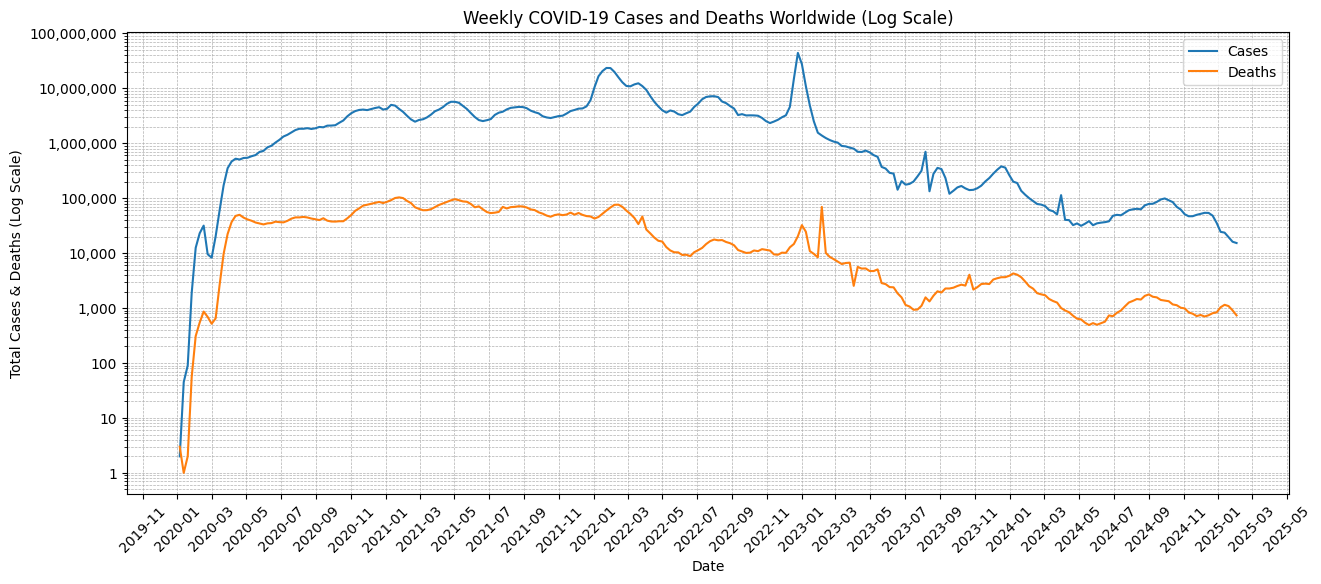

In [160]:
# change to weekly aggregate, on every Sunday
world_weekly_stats = df.resample('W-SUN', on='Date')[['New_cases', 'New_deaths']].agg(['sum']).reset_index() 
world_weekly_stats.columns = ['Date', 'New_cases', 'New_deaths']

# Plot
plt.figure(figsize=(15, 6))
sns.lineplot(x='Date', y='New_cases', data=world_weekly_stats, label='Cases')
sns.lineplot(x='Date', y='New_deaths', data=world_weekly_stats, label='Deaths')

# Improve X-axis readability (weekly intervals)
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))  # Show every week
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format as YYYY-MM

# Set Y-axis to logarithmic scale
plt.yscale('log')

# Improve Y-axis readability (log scale formatter)
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Labels & Title
plt.xlabel('Date')
plt.ylabel('Total Cases & Deaths (Log Scale)')
plt.title('Weekly COVID-19 Cases and Deaths Worldwide (Log Scale)')

plt.grid(True, which="both", linestyle="--", linewidth=0.5)  # Add grid for better readability
plt.legend()

plt.show()

The inconsistencies between two graph may be due to some countries only reporting their stats weekly, while other countries do daily reports.

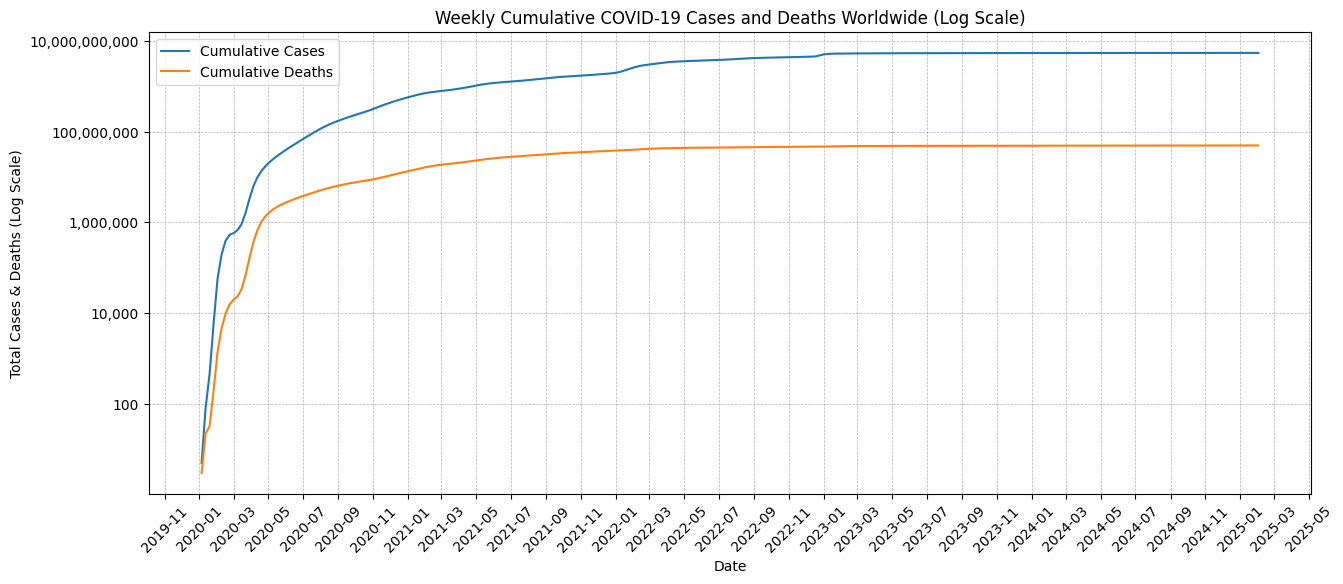

In [161]:
# change to weekly aggregate, on every Sunday
world_weekly_cstats = df.resample('W-SUN', on='Date')[['Cumulative_cases', 'Cumulative_deaths']].agg(['sum']).reset_index() 
world_weekly_cstats.columns = ['Date', 'Cumulative_cases', 'Cumulative_deaths']

# Plot
plt.figure(figsize=(15, 6))
sns.lineplot(x='Date', y='Cumulative_cases', data=world_weekly_cstats, label='Cumulative Cases')
sns.lineplot(x='Date', y='Cumulative_deaths', data=world_weekly_cstats, label='Cumulative Deaths')

# Improve X-axis readability (weekly intervals)
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))  # Show every week
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format as YYYY-MM

# Set Y-axis to logarithmic scale
plt.yscale('log')

# Improve Y-axis readability (log scale formatter)
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Labels & Title
plt.xlabel('Date')
plt.ylabel('Total Cases & Deaths (Log Scale)')
plt.title('Weekly Cumulative COVID-19 Cases and Deaths Worldwide (Log Scale)')

plt.grid(True, which="both", linestyle="--", linewidth=0.5)  # Add grid for better readability
plt.legend()

plt.show()

In [170]:
region_weekly_stats = df.groupby(['WHO_region', pd.Grouper(key='Date', freq='W-SUN')])[['New_cases', 'New_deaths']].sum().reset_index()
region_weekly_stats.head(3)


WHO_region       Date  New_cases  New_deaths
0        AFR 2020-01-05        0.0         0.0
1        AFR 2020-01-12        0.0         0.0
2        AFR 2020-01-19        0.0         0.0

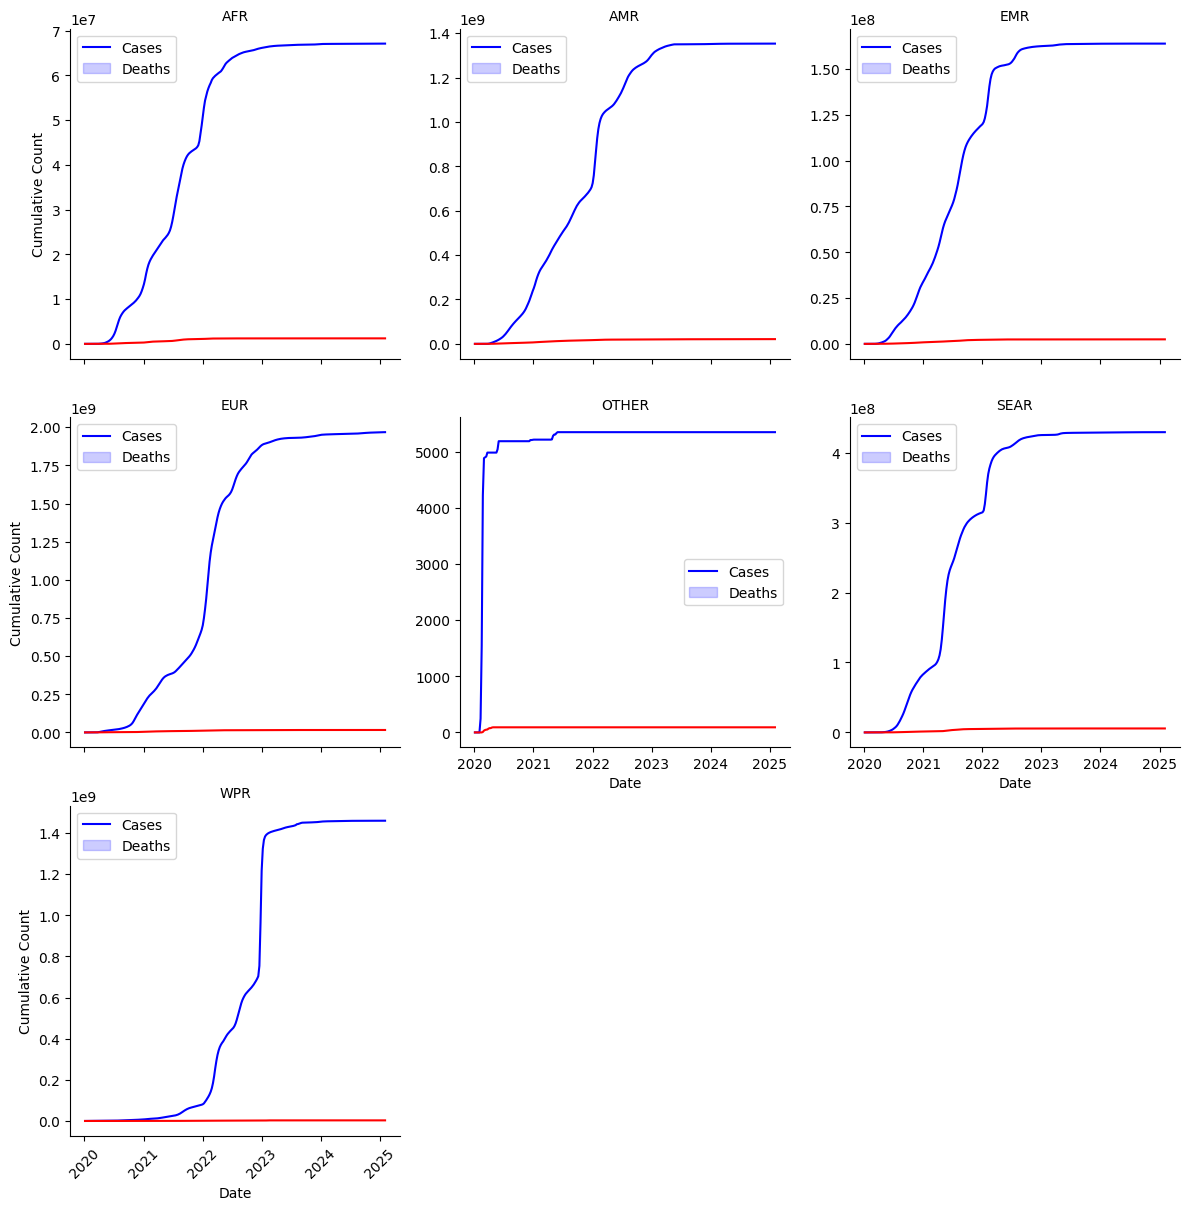

In [172]:
region_weekly_cstats = df.groupby(['WHO_region', pd.Grouper(key='Date', freq='W-SUN')])[['Cumulative_cases', 'Cumulative_deaths']].sum().reset_index()

# Initialize Seaborn FacetGrid for multiple regions
g = sns.FacetGrid(region_weekly_cstats, col="WHO_region", col_wrap=3, height=4, sharey=False)

# Plot cumulative cases
g.map(sns.lineplot, "Date", "Cumulative_cases", color="blue", label="Cases")

# Plot cumulative deaths on the same axis
g.map(sns.lineplot, "Date", "Cumulative_deaths", color="red", label="Deaths")

# Adjust plot labels
g.set_axis_labels("Date", "Cumulative Count")
g.set_titles("{col_name}")  # Show region name as title
plt.xticks(rotation=45)

# Add legend manually
for ax in g.axes.flat:
    ax.legend(["Cases", "Deaths"])

# Show the plot
plt.show()

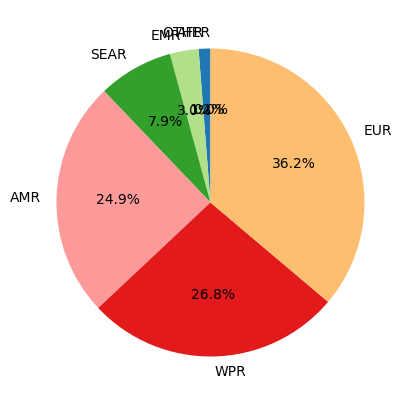

In [163]:
# pie chart of cases by WHO regions

cases_by_region = df.groupby('WHO_region')['New_cases'].agg(['sum']).reset_index().rename(columns={'sum': 'Total_cases'}).sort_values('Total_cases', ascending=True)
plt.figure(figsize=(5,5))
plt.pie(cases_by_region['Total_cases'], 
        labels=cases_by_region['WHO_region'], 
        autopct='%1.1f%%', 
        startangle=90 , 
        colors=plt.cm.Paired.colors
        )
plt.show()

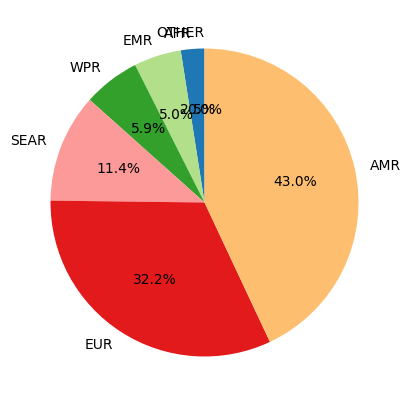

In [164]:
# pie chart of deaths by WHO regions

deaths_by_region = df.groupby('WHO_region')['New_deaths'].agg(['sum']).reset_index().rename(columns={'sum': 'Total_deaths'}).sort_values('Total_deaths', ascending=True)
plt.figure(figsize=(5,5))
plt.pie(deaths_by_region['Total_deaths'], 
        labels=deaths_by_region['WHO_region'], 
        autopct='%1.1f%%', 
        startangle=90 , 
        colors=plt.cm.Paired.colors)
plt.show()

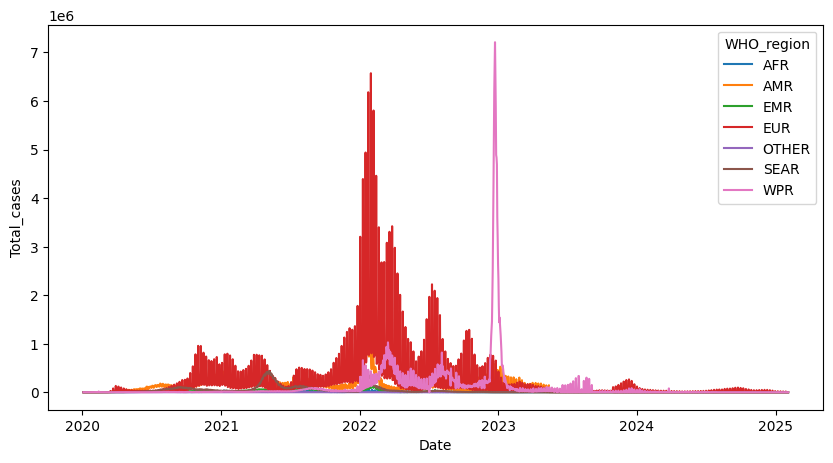

In [165]:
## line chart of cases over time by region
daily_cases_region = df.groupby(['WHO_region', 'Date'])['New_cases'].agg(['sum']).reset_index().rename(columns={'sum': 'Total_cases'})

plt.figure(figsize=(10,5))
sns.lineplot(x='Date', y='Total_cases', hue='WHO_region', data=daily_cases_region)
plt.show()

In [166]:
## top 10 countries with the highest number of cases
top10cases_country = df.groupby('Country')['New_cases'].sum().sort_values(ascending=False).head(10)
top10cases_country

Country
United States of America                                103436829.0
China                                                    99381761.0
India                                                    45044602.0
France                                                   39014130.0
Germany                                                  38437854.0
Brazil                                                   37511921.0
Republic of Korea                                        34571873.0
Japan                                                    33803572.0
Italy                                                    26959147.0
United Kingdom of Great Britain and Northern Ireland     25029134.0
Name: New_cases, dtype: float64

In [167]:
## top 10 countries with the highest number of deaths
top10deaths_country = df.groupby('Country')['New_deaths'].sum().sort_values(ascending=False).head(10)
top10deaths_country

Country
United States of America                                1216003.0
Brazil                                                   702116.0
India                                                    533662.0
Russian Federation                                       404188.0
Mexico                                                   334818.0
United Kingdom of Great Britain and Northern Ireland     232112.0
Peru                                                     220994.0
Italy                                                    199416.0
Germany                                                  174979.0
France                                                   168150.0
Name: New_deaths, dtype: float64